# Exercise 1

## Group Information
- Group Members: Luca Gebhardt, Jan Pfeifer
- Date: 10.11.2023
- Code: See .zip-file and https://github.com/pfeifer-j/resilient_networks_ex1 


## Introduction
In this exercise, we explore and analyze a directed and an undirected graph using Python and the igraph library. We present our data using Jupyter Notebook.

## Approach
### Step 1: Data Preparation
- We acquired the dataset located in the 'data' directory.
  - Gnutella09 (https://snap.stanford.edu/data/p2p-Gnutella09.html)
  - lastfm_asia (https://snap.stanford.edu/data/feather-lastfm-social.html)

Gnutella is a directed peer-to-peer network. It has 8,114 nodes and 26,013 edges.
Lastfm_asia is an undirected social network graph. It has 7600 nodes and 27806 edges.
We chose these two graphs because they are similar in size, but different in direction and general structure, which makes for an interesting comparison.

### Step 2: Analysis and Interpretation
- We computed the following metrics for both graphs:
  1. Average path length
  2. Density
  3. Average clustering coefficient
  4. Distribution of clustering coefficient
  5. Distribution of cohesiveness
  6. Edge persistence under greedy attack
  7. Edge persistence under random attack 

  
Finally, we interpret the metrics for both graphs and compare them with each other. The results are plotted using matplotlib.

## Analysis and Interpretation

### Gnutella | Directed Graph

In [14]:
# Generating the graph
import os
from src.GraphInput import TxtFileGraphInput
import matplotlib.pyplot as plt

file_path = os.path.join(
    os.getcwd(), "data/p2p-Gnutella09/p2p-Gnutella09.txt"
)

input = TxtFileGraphInput()
input.read_input_file_and_convert(file_path, directed=True)

In [15]:
# Density
print("Density: ", input.computed_density())

# Average Path Length
print("Average path length: ", input.compute_average_path_length())

# Average Clustering Coefficient
print("Average clustering coefficient: ", input.compute_clustering_coefficient()[0])

# Edge persistence under greedy targeted attack
print("Edge persistence under greedy targeted attack: ", input.compute_edge_persistence_under_greedy_attack())

# Edge persistence under random attack
print("Edge persistence under random attack: ",input.compute_edge_persistence_under_random_attack())

Density:  0.0003951608960942098
Average path length:  7.054623534882817
Average clustering coefficient:  0.07314316246453513
Edge persistence under greedy targeted attack:  16
Edge persistence under random attack:  195


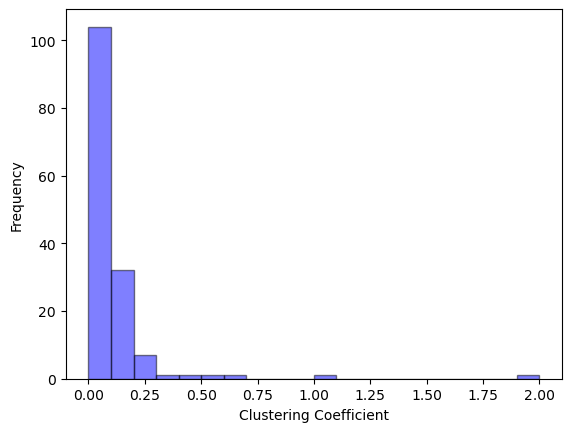

In [16]:
# Clustering Coefficient Distribution
clustering_coefficient_distribution = input.compute_clustering_coefficient()[1]
values = list(clustering_coefficient_distribution.keys())

plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.show()

Minimal cohesiveness:  8114
Maximal cohesiveness:  8114


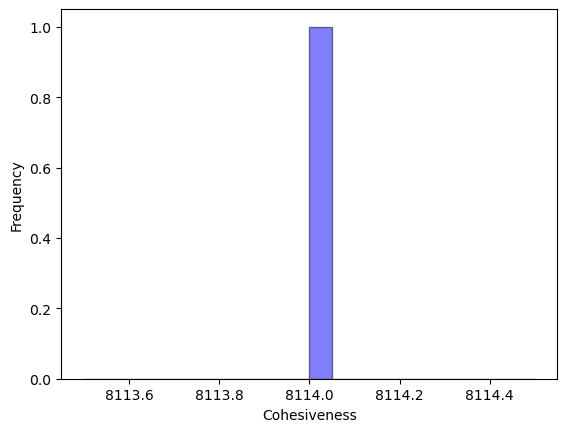

In [17]:
# Distribution of Cohesiveness
cohesiveness_values = input.compute_cohesiveness_distribution()
values = list(cohesiveness_values.values())

print("Minimal cohesiveness: ",  min(values))
print("Maximal cohesiveness: ",  max(values))

plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Cohesiveness')
plt.ylabel('Frequency')

plt.show()

#### Gnutella discussion

Gnutella has a density of 0.000395. A low density like this means that this graph is far away from being fully connected. In addition, the examined graph has an average path length of 7.05. Furthermore, the Gnutella graph has an average clustering coefficient of 0.073. This value is relatively low, indicating that the graph has a lower tendency for nodes to form tightly-connected clusters. This might suggest a more decentralized or loosely connected structure. The cohesiveness of 8114 indicates a relatively strong internal connectivity. Finally, the random and greedy attacks show that a greedy attack on the nodes with the highest degree is more effective than a random attack to increase the edge persistence.

### lastfm_asia | Undirected Graph

In [18]:
# Generating the graph
import os
from src.GraphInput import CsvFileGraphInput
import matplotlib.pyplot as plt

file_path = os.path.join(
    os.getcwd(), "data/lastfm_asia/lastfm_asia_edges.csv"
)

input = CsvFileGraphInput()
input.read_input_file_and_convert(file_path, directed=False)

In [19]:
# Density
print("Density: ", input.computed_density())

# Average Path Length
print("Average path length: ", input.compute_average_path_length())

# Average Clustering Coefficient
print("Average clustering coefficient: ", input.compute_clustering_coefficient()[0])

# Edge persistence under greedy targeted attack
print("Edge persistence under greedy targeted attack: ", input.compute_edge_persistence_under_greedy_attack())

# Edge persistence under random attack
print("Edge persistence under random attack: ",input.compute_edge_persistence_under_random_attack())

Density:  0.0009568849118596329
Average path length:  5.232237268915701
Average clustering coefficient:  0.5792989035189058
Edge persistence under greedy targeted attack:  57
Edge persistence under random attack:  442


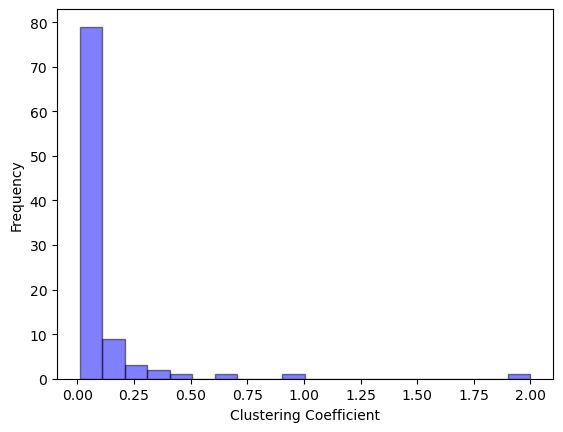

In [20]:
# Clustering Coefficient Distribution
clustering_coefficient_distribution = input.compute_clustering_coefficient()[1]
values = list(clustering_coefficient_distribution.keys())

plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.show()

Minimal cohesiveness:  1338
Maximal cohesiveness:  6286


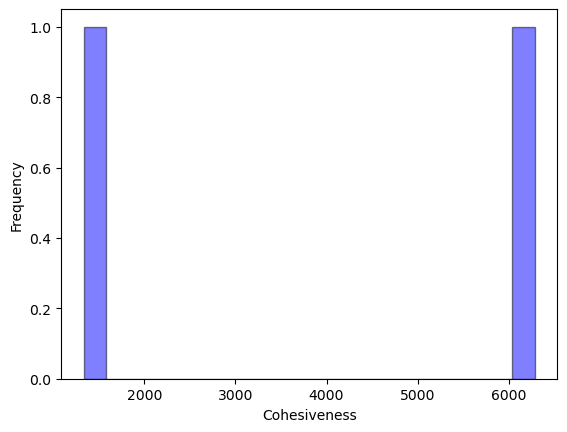

In [21]:
# Distribution of Cohesiveness
cohesiveness_values = input.compute_cohesiveness_distribution()
values = list(cohesiveness_values.values())

print("Minimal cohesiveness: ",  min(values))
print("Maximal cohesiveness: ",  max(values))

plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Cohesiveness')
plt.ylabel('Frequency')

plt.show()

#### Lastfm Discussion
The density of 0.000957 is low, indicating a sparse graph with relatively few connections. The average number of steps to travel between nodes suggests moderate efficiency in information propagation, with a value of 5.23. The average clustering coefficient reflects moderate local connectivity, with a value of 0.579, indicating how well neighbors of nodes are connected.
The cohesiveness is separated into nodes with values of 1338 and 6286. As observed in the Gnutella analysis, the greedy attack proves to be significantly more effective than the random attack in Lastfm. Removing nodes through a greedy attack requires almost 8 times more removals to increase the network's edge connectivity.

## Conclusion
Comparing the graph metrics of Gnutella and lastfm networks, both exhibit low density, indicating sparse connectivity. However, the lastfm graph has a somewhat lower density than Gnutella. In terms of average path length, Gnutella has a longer path length (7.05) compared to lastfm (5.23), implying more efficient information propagation in the latter. The average clustering coefficient is significantly higher in lastfm, indicating stronger local connectivity. Lastly, both networks show a preference for greedy attacks on high-degree nodes to increase edge persistence, similar to Gnutella. Though both graphs are earlier affected by greedy attacks, the lastfm graph shows a higher resilience against both attacks. Gnutella's edge persistence of 16 is considerably lower than lastfms edge persistence of 57 when they are facing a greedy attack. A similar difference can be observed with the random attack just with higher values. However, the lastfm graph is more resilient against attacks. An assumption is that, due to its direction lastfm is more resilient against attacks that target the edge persistence. Overall, lastfm appears to have a more tightly connected structure with more efficient information flow. One advantage of the Gnutella graph is its decentralized and peer-to-peer nature. This design allows scalability in file-sharing and content distribution networks. It can adapt and continue to function even when individual nodes join or leave the network, which can be advantageous for maintaining network availability.